In [7]:
import pandas as pd
import altair as alt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('googleplaystore.csv')
df = df.sample(1000)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
500,"Blendr - Chat, Flirt & Meet",DATING,4.0,28671,Varies with device,"1,000,000+",Free,0,Mature 17+,Dating,"August 1, 2018",Varies with device,Varies with device
670,Free Dating & Flirt Chat - Choice of Love,DATING,4.0,42197,Varies with device,"5,000,000+",Free,0,Mature 17+,Dating,"July 24, 2018",Varies with device,Varies with device
2952,Add Text To Photo,PHOTOGRAPHY,4.1,21578,1.6M,"1,000,000+",Free,0,Everyone,Photography,"September 8, 2017",1.1.3,2.3 and up
4008,Alt-C,PRODUCTIVITY,4.0,499,4.7M,"10,000+",Free,0,Everyone,Productivity,"January 27, 2017",1.37,4.0 and up
2364,Davis's Drug Guide for Nurses,MEDICAL,4.5,572,44M,"50,000+",Free,0,Everyone,Medical,"July 13, 2018",4.3.2.315,4.4 and up


Binned histogram of reviews 

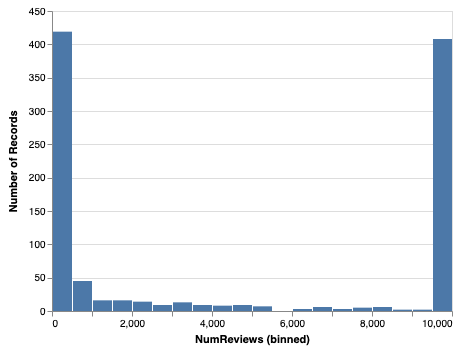

In [10]:
df["NumReviews"] = pd.to_numeric(df["Reviews"])
alt.Chart(df).mark_bar().encode(alt.X("NumReviews", bin=alt.Bin(maxbins=20, extent=[0, 10000])), y="count()")

Looking only at non-free app, plot price vs. number of installs. Use color to represent genre.

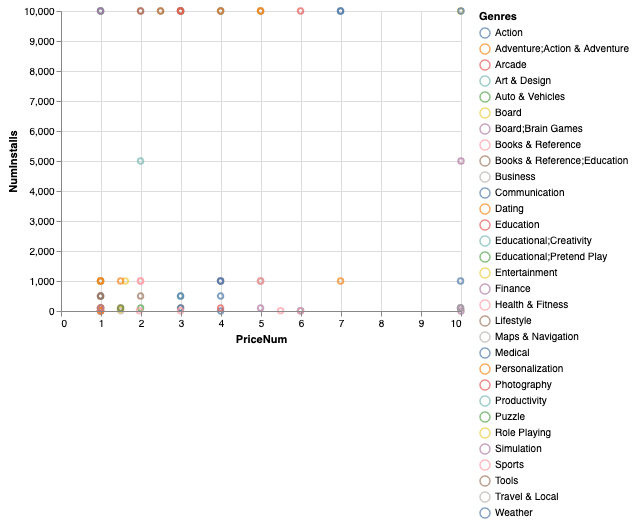

In [19]:
df_paid = df[df.Type=="Paid"]
df_paid["PriceNum"] = pd.to_numeric(df_paid.Price.str.replace("$", "")).clip(0, 10)
df_paid["NumInstalls"] = pd.to_numeric(df_paid.Installs.str.strip("+").str.replace(",", "")).clip(0, 10000)
alt.Chart(df_paid).mark_point().encode(x="PriceNum", y="NumInstalls", color="Genres")

Compute percentage of users reviewing (reviews / installs). Then graph percentage reviewing vs rating

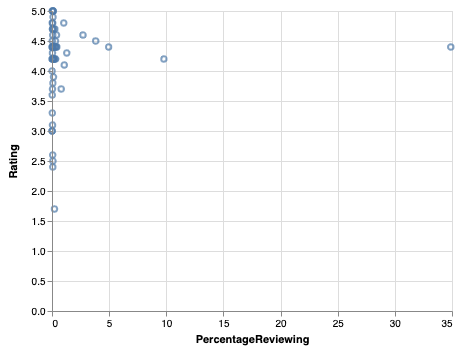

In [22]:
df_paid["PercentageReviewing"] = pd.to_numeric(df_paid.Reviews) / df_paid.NumInstalls
alt.Chart(df_paid).mark_point().encode(x="PercentageReviewing", y="Rating")